## Variance reduction method  analysis

In [11]:
import matplotlib.pyplot as plt
from libraries.methods import Mandelbrot
import pandas as pd
import numpy as np

In [12]:
Mandelbrot_random = Mandelbrot(method="random", samples=2500, iterations=500, x_min=-2, x_max = 0.6, y_min=-1.2, y_max = 1.2)
Mandelbrot_hypercube = Mandelbrot(method="hypercube", samples=2500, iterations=500, x_min=-2, x_max = 0.6, y_min=-1.2, y_max = 1.2)
Mandelbrot_orthogonal = Mandelbrot(method="orthogonal", samples=2500, iterations=500, x_min=-2, x_max = 0.6, y_min=-1.2, y_max = 1.2)

In [13]:
simulations = 1000
_, areas_random            = Mandelbrot_random.simulate(simulations)
_, areas_random_stratified = Mandelbrot_random.stratified_estimation(simulations)
_, areas_hyper             = Mandelbrot_hypercube.simulate(simulations)
_, areas_hyper_stratified  = Mandelbrot_hypercube.stratified_estimation(simulations)
_, areas_ortho             = Mandelbrot_orthogonal.simulate(simulations)
_, areas_ortho_stratified  = Mandelbrot_orthogonal.stratified_estimation(simulations)

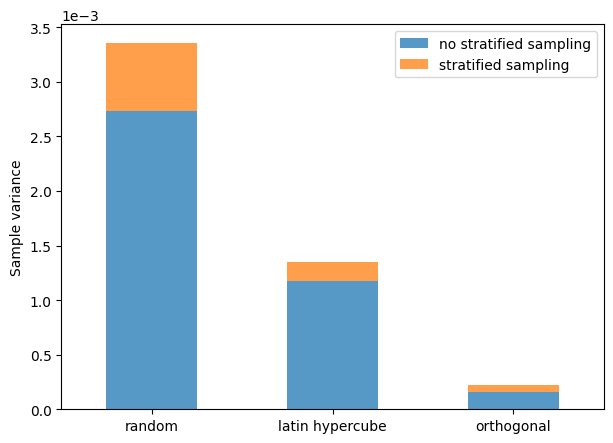

In [27]:
X_AXIS = ('random', 'latin hypercube', 'orthogonal')

index = pd.Index(X_AXIS, name='')

data = {'no stratified sampling': (np.var(areas_random, ddof=1), np.var(areas_hyper, ddof=1), np.var(areas_ortho, ddof=1)),
        'stratified sampling': (np.var(areas_random_stratified, ddof=1), np.var(areas_hyper_stratified, ddof=1), np.var(areas_ortho_stratified, ddof=1))}

df = pd.DataFrame(data, index=index)

ax = df.plot(kind='bar', stacked=True, figsize=(7, 5), alpha=0.75, rot=0)
ax.set_ylabel('Sample variance')
ax.legend(title=None, loc='upper right')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# plt.savefig(f'./images/stratified_variance_comparsion_n2500_i500_s{simulations}.png')
plt.show()